# Planform Design
* Visualize the planform in 2D
* Calculate the (total) wing area and aspect ratio, as well as individual areas/ARs for the centerbody and wings
* Calculate the centroid
* Calculate the MAC (mean aerodynamic chord)
* Generate inputs for further analysis in AVL.

,NF-844-B
overall_area,0.584
overall_span,1700.000
overall_mean_aerodynamic_chord,343.529
overall_aspect_ratio,4.949
overall_centroid,576.032
wing_span,665.000
wing_half_area,0.173
wing_mean_aerodynamic_chord,285.128
wing_aspect_ratio,5.115
wing_centroid,686.488


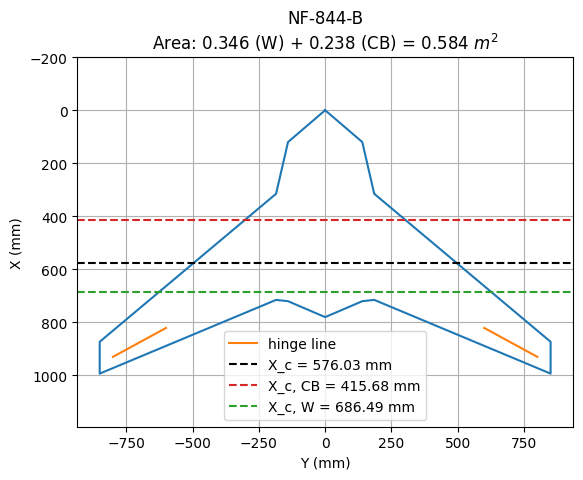

\begin{tabular}{lr}
\toprule
 & NF-844-B \\
\midrule
overall_area & 0.584000 \\
overall_span & 1700.000000 \\
overall_mean_aerodynamic_chord & 343.529412 \\
overall_aspect_ratio & 4.948630 \\
overall_centroid & 576.031583 \\
wing_span & 665.000000 \\
wing_half_area & 0.172900 \\
wing_mean_aerodynamic_chord & 285.128205 \\
wing_aspect_ratio & 5.115385 \\
wing_centroid & 686.487694 \\
centerbody_span & 185.000000 \\
centerbody_half_area & 0.119100 \\
centerbody_aspect_ratio & 0.574727 \\
centerbody_centroid & 415.680101 \\
\bottomrule
\end{tabular}



In [4]:
import pandas as pd
from IPython.display import display

from wyvern.analysis.parameters import PlanformParameters
from wyvern.layout import planform_stats, planform_viz

# Planforms are described by the PlanformParameters class
NF_844_A = PlanformParameters(
    name="NF-844-A",
    centerbody_halfspan=200,
    centerbody_chord=780,
    midbody_y=170,
    midbody_xle=120,
    midbody_chord=600,
    wing_root_le=360,
    wing_root_chord=360,
    wing_halfspan=700,
    wing_taper_ratio=0.33333,
    wing_root_le_sweep_angle=40,
    ctrl_surface_start_y=600,
    ctrl_surface_end_y=800,
    ctrl_surface_x_over_c=0.3,
)

NF_844_B = PlanformParameters(
    name="NF-844-B",
    centerbody_halfspan=185,
    centerbody_chord=780,
    midbody_y=140,
    midbody_xle=120,
    midbody_chord=600,
    wing_root_le=315,
    wing_root_chord=400,
    wing_halfspan=665,
    wing_taper_ratio=0.3,
    wing_root_le_sweep_angle=40,
    ctrl_surface_start_y=600,
    ctrl_surface_end_y=800,
    ctrl_surface_x_over_c=0.3,
)

# concatenate the two planforms into a single DataFrame
planform_df =planform_stats(NF_844_B)

with pd.option_context('display.precision', 3):
    display(planform_df.transpose())
planform_viz(NF_844_B)
print(planform_df.transpose().to_latex())

In [5]:
# Turn planform parameters into AVL input file
from wyvern.layout.planform import span_stations_to_avl, planform_span_stations

print(span_stations_to_avl(planform_span_stations(NF_844_A)))

SECTION
0.0 0.0 0.0 780.0 0.0
SECTION
120.0 170.0 0.0 600.0 0.0
SECTION
360.0 200.0 0.0 360.0 0.0
SECTION
695.639852470912 600.0 0.0 222.85645714285715 0.0
CONTROL
elevon 1.0 851.639372470912 0. 1. 0. 1.0
SECTION
863.459778706368 800.0 0.0 154.28468571428573 0.0
CONTROL
elevon 1.0 971.459058706368 0. 1. 0. 1.0
SECTION
947.369741824096 900.0 0.0 119.9988 0.0



In [6]:
from wyvern.layout.planform import span_stations_to_tikz

print(span_stations_to_tikz(planform_span_stations(NF_844_B)))

\begin{scope}[y=-1cm, x=1cm]
\draw[thick] (0.0, 0.0) -- (1.4, 1.2) -- (1.85, 3.15) -- (6.0, 6.632263469385712) -- (8.0, 8.310462731740271) -- (8.5, 8.730012547328911) -- (8.5, 9.930012547328912) -- (8.0, 9.720989047529747) -- (6.0, 8.88489504833308) -- (1.85, 7.15) -- (1.4, 7.2) -- (0.0, 7.8) -- (-0.0, 7.8) -- (-1.4, 7.2) -- (-1.85, 7.15) -- (-6.0, 8.88489504833308) -- (-8.0, 9.720989047529747) -- (-8.5, 9.930012547328912) -- (-8.5, 8.730012547328911) -- (-8.0, 8.310462731740271) -- (-6.0, 6.632263469385712) -- (-1.85, 3.15) -- (-1.4, 1.2) -- (-0.0, 0.0) ;
\end{scope}
